# Group 2 ML II Assignment
## Team members: 
- Roman Zotkin
- Daniel Sebastian de la Torre
- Fabio Venturini Sanchez 
- Niels van Meijel
- Marina Osorio Feijoo
- Muriel Judith Vergara
- Alberto Fuentes Arce


## Group Assignment: Machine Learning 2

This year's Group Assignment will verse on predicting employee attrition. The dataset is available on Kaggle: [Employee Attrition competition](https://www.kaggle.com/competitions/playground-series-s3e3/data)

* The goal is to predict whether an employee will leave the company or not (`Attrition` column, binary classification).
* The dataset is artificially generated, but it is based on real data: [original data](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
    * Here you can find what each feature represents and their possible values.
* You're given a training set and a test set. 
    * Perform your analysis, experiments and model selection on the training set, and don't touch the test set until you're ready to submit your predictions.
    * You can save some data from the training set to use as a validation set, but you should not use the test set for this purpose.
    * Once you're comfortable with the performance of your model on the training set, you can use the test set to get a final estimate of the performance of your model.
    * The CSV file that you will submit, should contain the predictions of your model on the test set. This means that the CSV should contain as many rows as the test set, and a single column with the predictions (0 or 1).

### 1. Rules

* You should work within your team. If I see any signs of cheating between teams, that's and immediate fail for both groups.
  * If you have any question, post it on Slack and I will answer it as soon as possible.
* The grade will be the same for all the members of the team.
* Everyone within the team should contribute and all of you will have to either present or answer questions during the presentation.
  * If somebody in the team is not collaborating, let me know as soon as possible since I will not accept any excuses at the end of the term
  * Help the others in the team to understand the code and the results, because they might be asked to explain it during the presentation
* It's fine to explore and learn from out there. 
  * I want to see that you are learning and that you are trying to improve your skills. However, you should not just copy-paste code from other sources -tell me where is it from and show me it's useful for your assignment-
  * If you just copy and paste, I will know and I will ask you about it, so be prepared.
* The final submission should use any of the algorithms that we've seen during the course, so no neural networks or similar. There's will be a time for that, but not now.


### 2. Submission

**1 ZIP file per group, named `submission_group_X.zip`, containing:**
  * A Jupyter Notebook with the code and the results, mandatory to include the names of the members of the team.
  * A PDF file with the presentation.
  * A CSV file with the predictions for the test set.
  * Failing to submit any of the above in the required conditions will result in a 0 for the Group Assignment.

### 3. Grade

The Group Assignment will weight 40% of the final grade. The grade will be based on the following criteria:
* **40%: PDF report and presentation**
    * The report should be done for an executive audience, so don't go too much into the technical details underneath the algorithms. 
    * It should cover a brief exploration of the data, the experiments done regarding feature engineering and the algorithms used, the results and the conclusions.
    * For the presentation, I will choose somebody from the team to present.
* **30%: Code in Jupyter notebook**
    * Comment why you're doing what you're doing.
    * Document your experiments and the results in the notebook.
    * Make sure that you do all your `import`s at the beginning of the notebook, so that I know what packages you're using. If your code doesn't run, I will not grade it fully.
* **30%: Answers to my questions during the presentation**
    * There will be questions about the data and its exploration, the experiments done with the features and with the algorithms, and obviously about the performance and results.

In [9]:
%matplotlib inline

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
#plt.style.use('ggplot')
pd.options.display.max_columns = 35

#eda
import os
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency
import plotly.express as px

#sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate , cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix, plot_roc_curve, auc, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import shap


In [11]:
os.getcwd()

'C:\\Users\\niels\\Documents\\Masters\\MBD\\Second Period\\ML II\\g2\\Final'

In [12]:
data = pd.read_csv("train.csv")

In [13]:
data.sample(3)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
405,405,42,Travel_Rarely,390,Research & Development,7,3,Life Sciences,1,4,Male,58,3,5,Manager,3,Single,19847,21972,2,Y,Yes,14,3,4,80,0,24,4,3,22,7,14,17,0
370,370,30,Travel_Frequently,1339,Sales,21,2,Life Sciences,1,3,Male,32,3,1,Sales Representative,4,Divorced,9250,19294,1,Y,No,11,3,2,80,1,1,2,3,1,0,0,0,0
1056,1056,40,Travel_Rarely,1116,Research & Development,1,4,Medical,1,3,Male,57,3,5,Manager,1,Married,18172,6705,4,Y,No,11,3,3,80,0,21,3,4,8,7,1,7,0


In [14]:
data.shape

(1677, 35)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [16]:
data.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [17]:
data["id"].nunique()

1677

### Exploratory Data Analysis

#### Pandas Profiling Report

In [18]:
ProfileReport(data).to_file(f"profiling/EDA_Raw_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### columns by level of measurement. 
- Columns with no meaning at all: EmployeeCounts, Over18 (filled with only ones), PerformanceRating (3-4?), StandardHours (all 80)

- Nominal (binary): Gender, OverTime, StandardHours

- Nominal (non-binary): BusinessTravel(may have an order), Department, EducationField, JobRole, MaritalStatus

- Ordinal: EnvironmentSatisfaction, StockOptionLevel, Education, JobInvolvement, JobLevel (one outlier), JobSatisfaction, Relationship Satisfaction, WorkLifeBalance, TrainingTimesLastYear

- Ratio: Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [19]:
data.shape

(1677, 35)

In [20]:
bs = ['id', 'EmployeeCount', 'Over18', 'StandardHours']
nom_bi_col= ['Attrition','Gender','OverTime', 'PerformanceRating']
nom_cols= ['Department', 'JobLevel','BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']
ordinal_cols = ['EnvironmentSatisfaction','StockOptionLevel', 'Education', 'JobInvolvement',  'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear']
ratio_cols = ['DistanceFromHome', 'YearsSinceLastPromotion','YearsAtCompany', 'NumCompaniesWorked','Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager' ]

In [21]:
len(bs+ nom_bi_col+ordinal_cols+nom_cols+ratio_cols)

35

#### BoxPlots

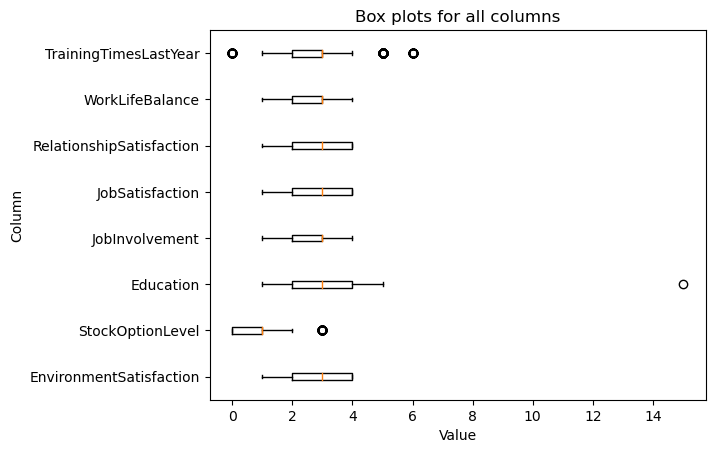

In [22]:
fig, ax = plt.subplots()

# loop over each column that is ordinal and ratio of and create a horizontal box plot
for i, col in enumerate(ordinal_cols):
    ax.boxplot(data[col], positions=[i], vert=False)
    
# set the y-axis tick labels to the column names
ax.set_yticks(range(len(ordinal_cols)))
ax.set_yticklabels(ordinal_cols)

# set the title and axis labels
ax.set_title('Box plots for all columns')
ax.set_xlabel('Value')
ax.set_ylabel('Column')

plt.show()

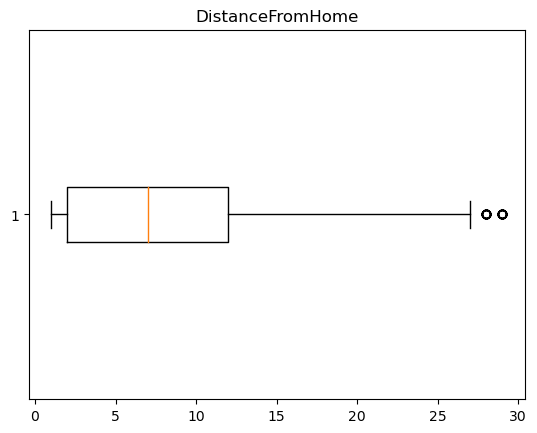

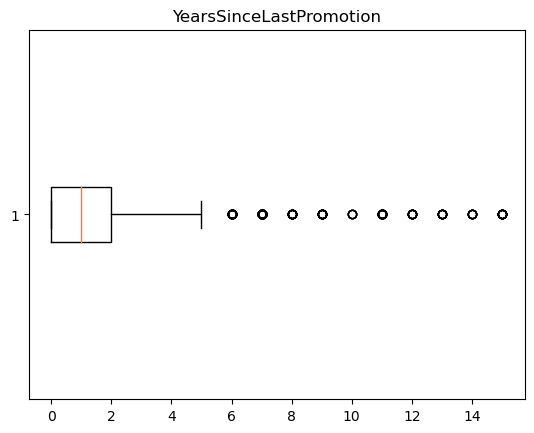

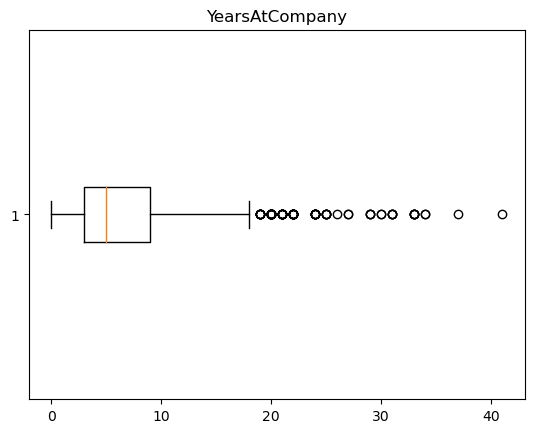

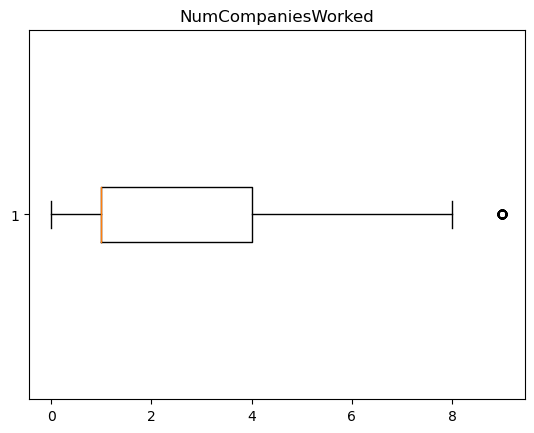

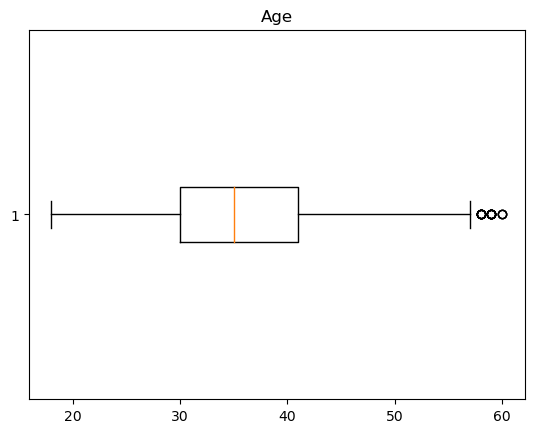

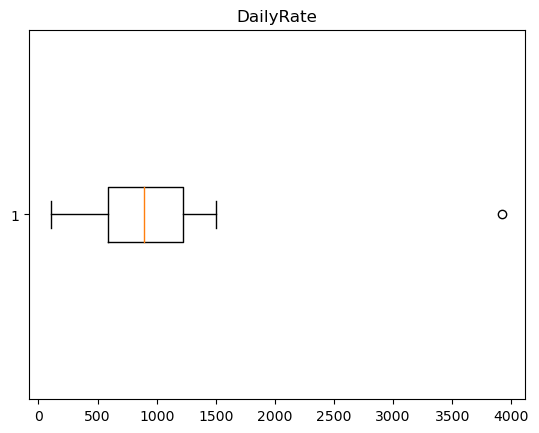

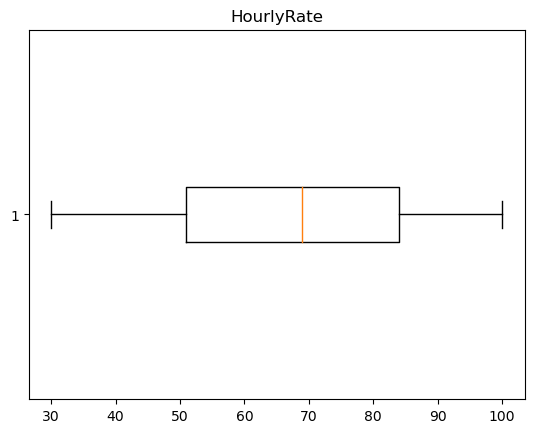

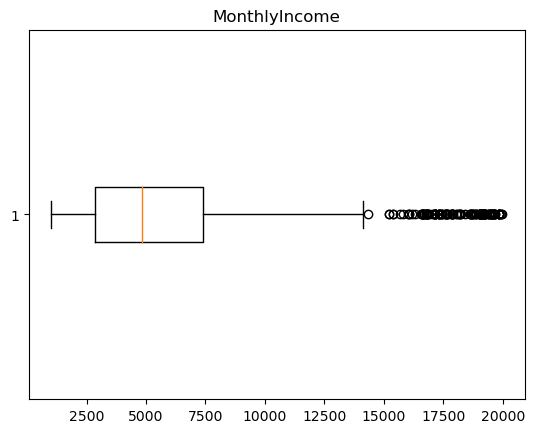

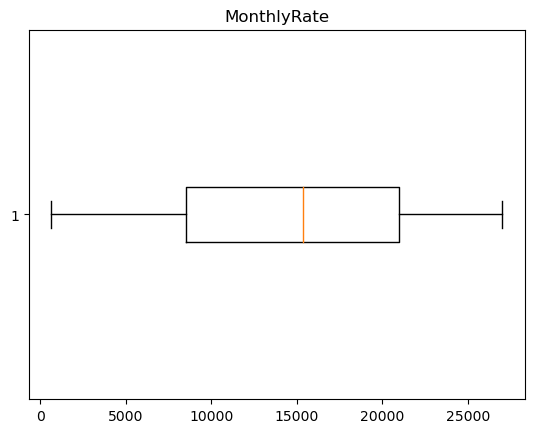

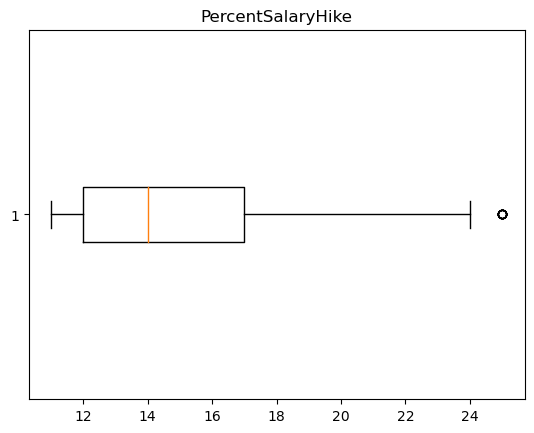

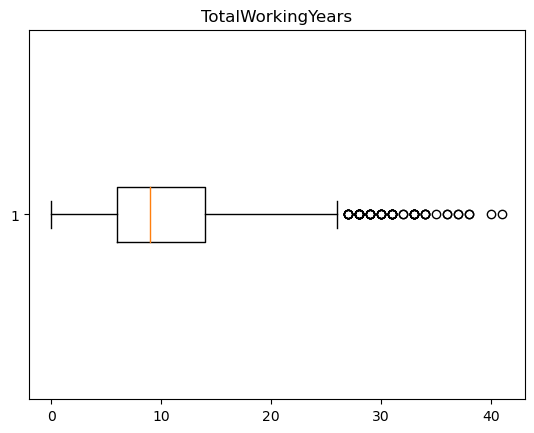

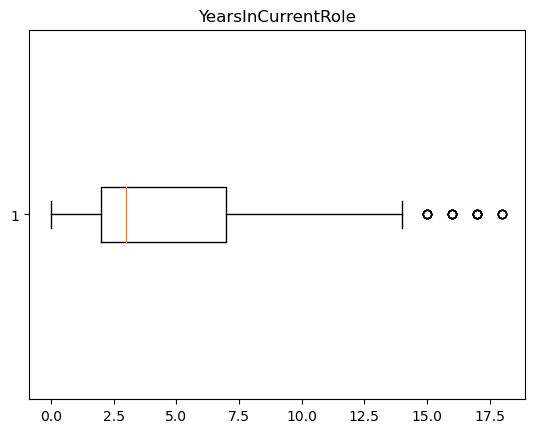

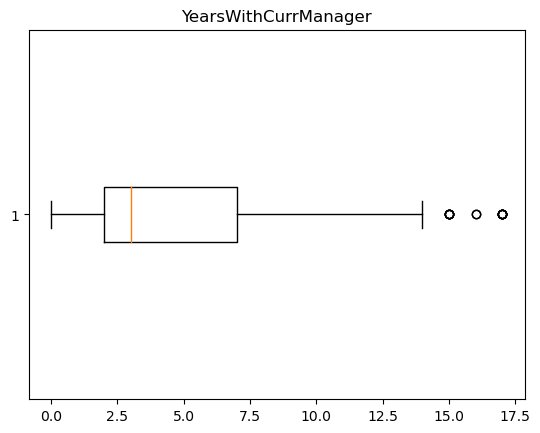

In [23]:
for col in (ratio_cols):
    fig, ax = plt.subplots()
    ax.boxplot(data[col], vert=False)
    ax.set_title(col)
    plt.show()

#### Histograms

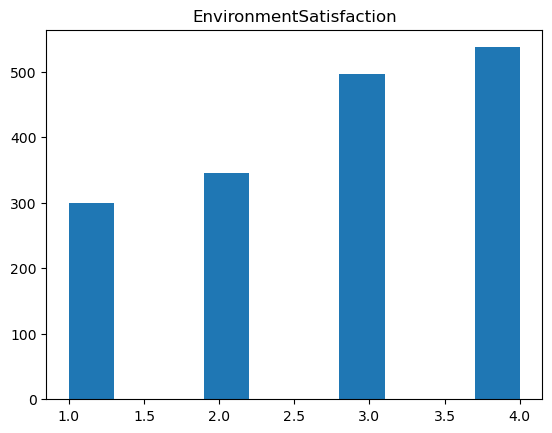

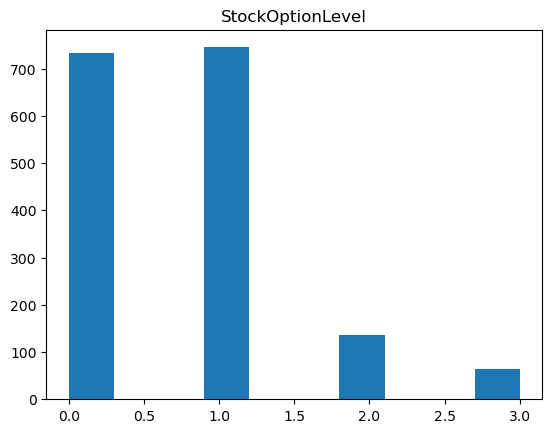

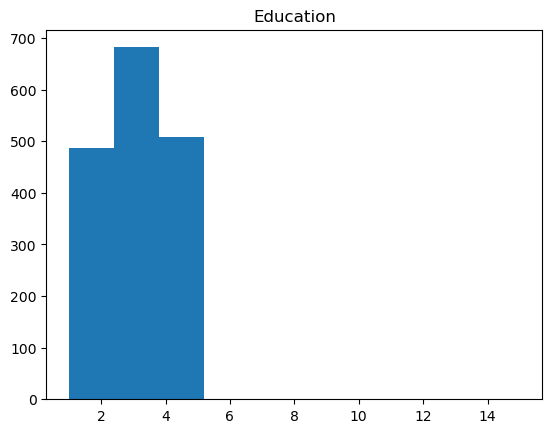

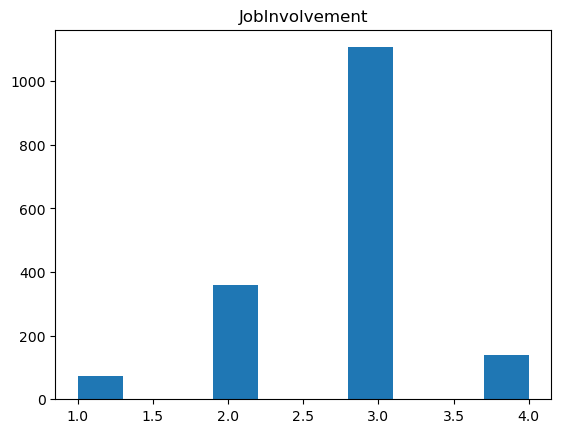

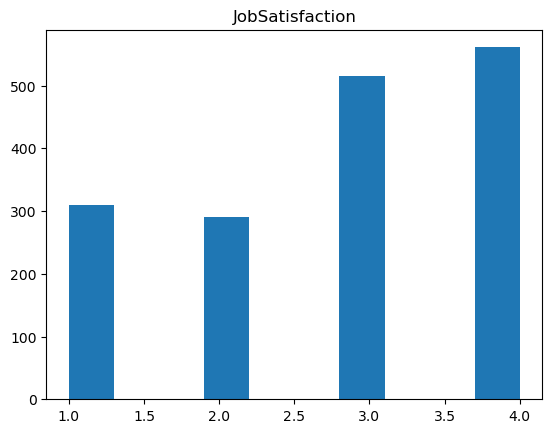

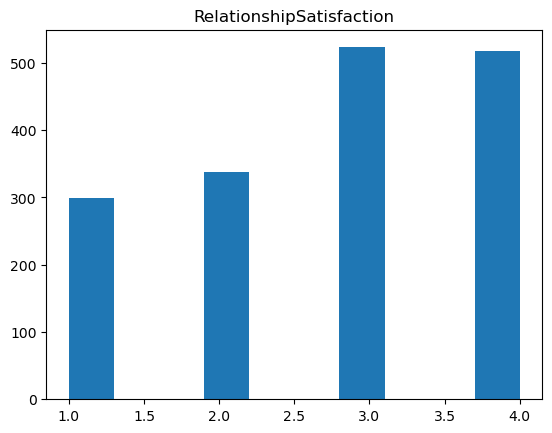

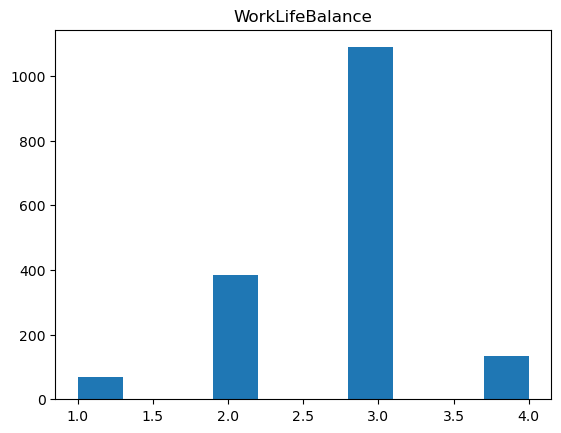

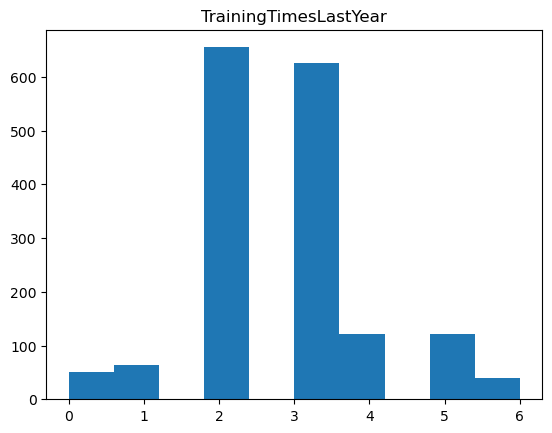

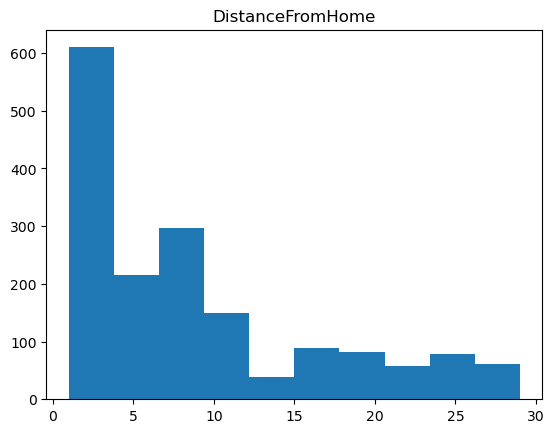

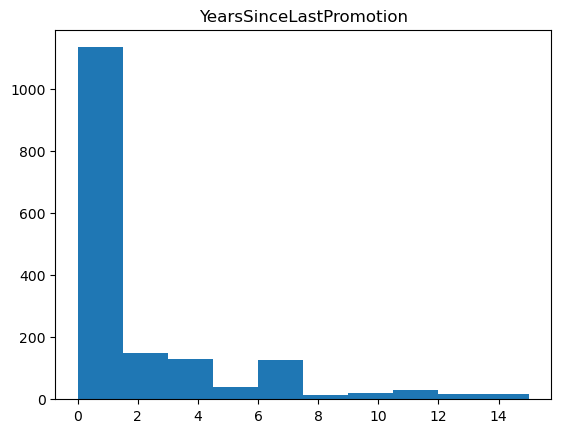

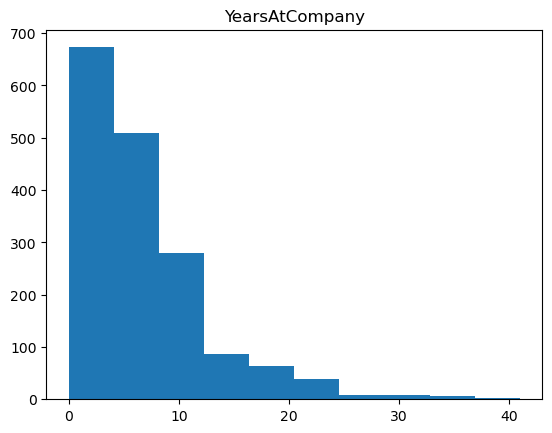

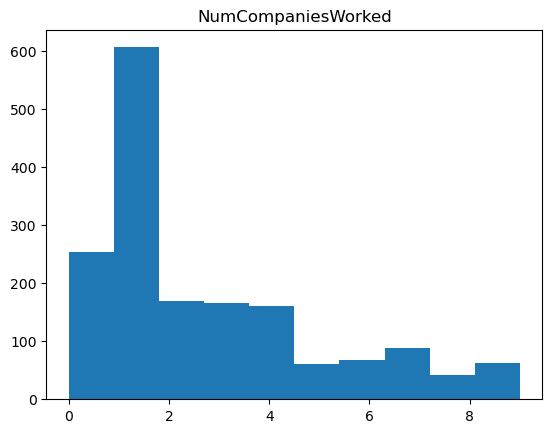

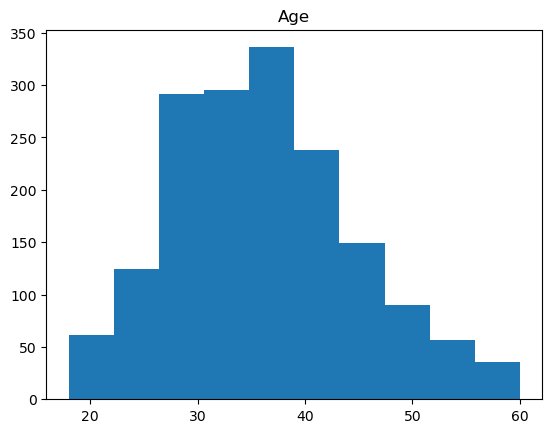

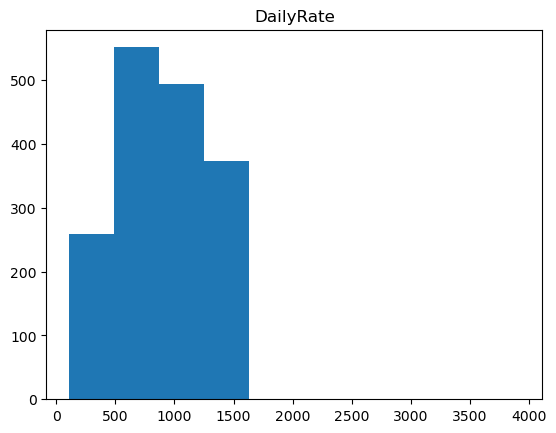

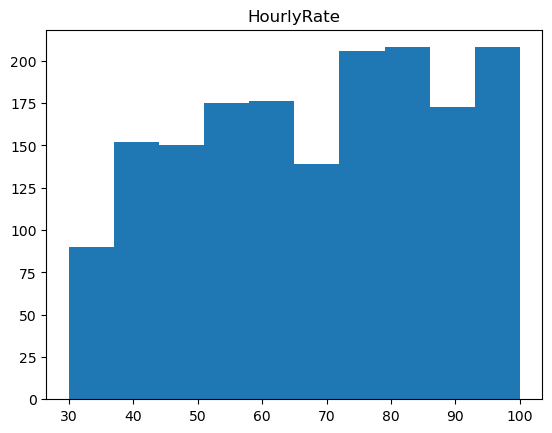

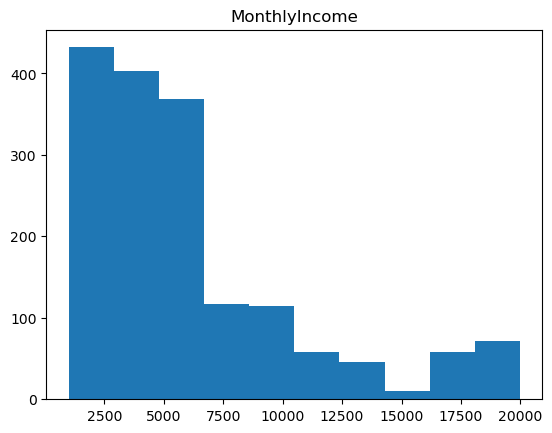

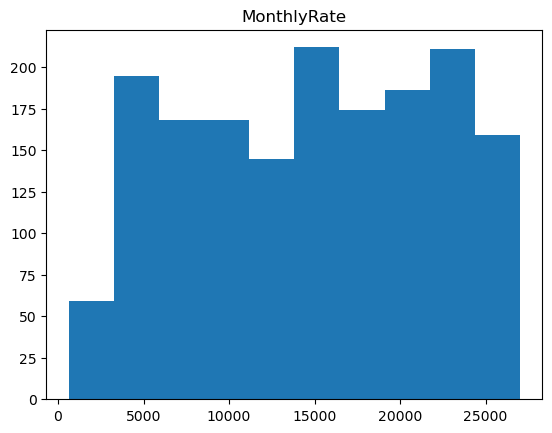

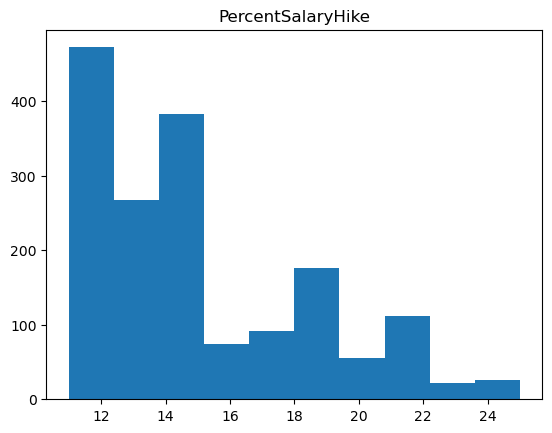

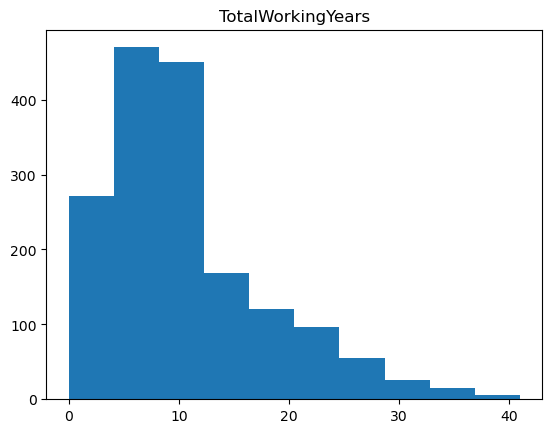

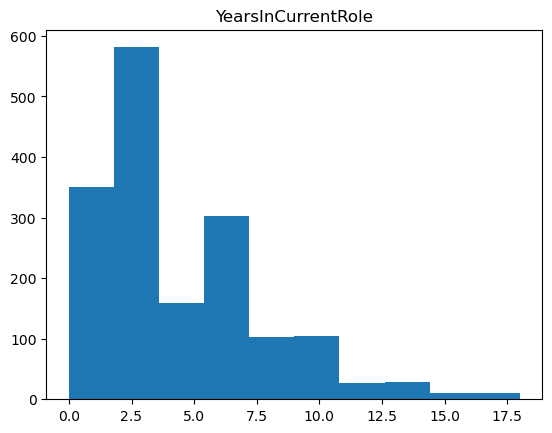

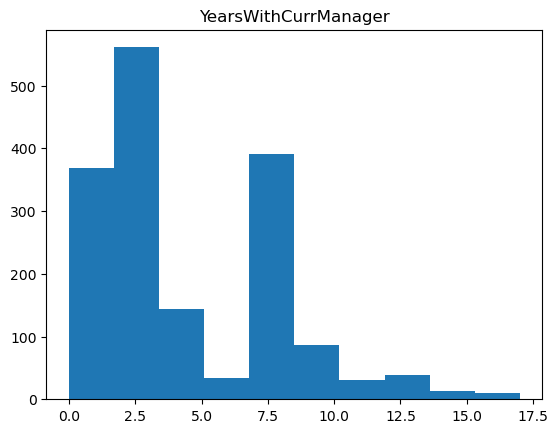

In [24]:
#Daily Rate and Education have outliers.

num_cols = list(data[ordinal_cols+ratio_cols].columns)

for column in num_cols:
    plt.figure()
    plt.hist(data[column])
    plt.title(column)
    plt.show()
    #marketig mix model 

In [25]:
#id is a nominal variable

#### Manual Checks

##### Business Travel

In [26]:
#Business Travel - suggest One Hot encoding to 0 ('Non-travel'), 1 ('Travel_Rarely'), 2 ('Travel_Frequently')
data['BusinessTravel'].unique()

array(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'], dtype=object)

In [27]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64

In [28]:
#Daily Rate - replace the outlier???

##### Department

In [29]:
#Department - suggest OHE
data["Department"].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [30]:
data['Department'].value_counts()

Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64

##### Education

In [31]:
#Education - values are ordinal. Suggest replacing value 15 with 3.
data['Education'].unique()

array([ 3,  4,  1,  2,  5, 15], dtype=int64)

In [32]:
data['Education'].value_counts()

3     682
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64

In [33]:
data.loc[data['Education'] == 15]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
527,527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,1,Female,72,3,1,Laboratory Technician,4,Divorced,2644,6217,7,Y,No,13,3,1,80,1,7,2,3,5,2,1,4,0


In [34]:
#most frequent value Lab Technicians in Life Sciences
data.loc[(data["JobRole"]=="Laboratory Technician") & (data["EducationField"]=="Life Sciences")]["Education"].mode()

0    3
Name: Education, dtype: int64

##### Education Field

In [35]:
#EducationField - what to do?
data['EducationField'].unique()

array(['Medical', 'Other', 'Marketing', 'Life Sciences',
       'Technical Degree', 'Human Resources'], dtype=object)

##### Employee Count

In [36]:
#EmployeeCount - suggest to drop
data['EmployeeCount'].nunique()

1

##### Environment Satisfaction

In [37]:
#EnvironmentSatisfaction - ordinal values, suggest to keep as is
data["EnvironmentSatisfaction"].unique()

array([4, 1, 3, 2], dtype=int64)

##### Gender

In [38]:
#Gender - suggest 1, 0  ordinal encoding
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

##### Job Involvement

In [39]:
#JobInvolvement - ordinal values, suggest to keep as is
data['JobInvolvement'].unique()

array([3, 1, 2, 4], dtype=int64)

##### Job Level

In [40]:
#JobLevel - ordinal values, suggest to keep as is.
data['JobLevel'].unique()

array([1, 2, 5, 3, 4, 7], dtype=int64)

In [41]:
data['JobLevel'].value_counts() #mode = 1

1    655
2    617
3    235
4     94
5     75
7      1
Name: JobLevel, dtype: int64

##### Job Role

In [42]:
#JobRole - categorical values. What to do?
data['JobRole'].unique()

array(['Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director'],
      dtype=object)

##### Marital Satus

In [43]:
#MaritalStatus. OHE?
data['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

##### Over 18

In [44]:
#Over18 - suggest to drop
data["Over18"].unique()

array(['Y'], dtype=object)

In [45]:
#PerformanceRating - values are either excellent or outstanding. Binary... Should we make it Boolean? Or leave it
'''Label Encoding'''
data["PerformanceRating"].unique()

array([3, 4], dtype=int64)

In [46]:
#StandardHours - same value everywhere. Suggest to drop
'''Drop'''

data["StandardHours"].unique()

array([80], dtype=int64)

In [47]:
#StockOptionLevel - seems ordinal. Suggest to keep as is.
'''OHE'''

data["StockOptionLevel"].unique()

array([1, 2, 0, 3], dtype=int64)

#### Outlier Detection using IQR

By starting with the transposed .describe() return of the ratio columns, we used the IQR to classify rows as outliers. 
The Dataframe was used to retrieve the upper and lower bounds using the following two formulas

- low outlier = Q1 - 1.5 * IQR 
- high outlier = Q3 - 1.5 * IQR

Once the bounds were extracted a function was written to count for each column in this ratio columns dataframe whether the rows are inside or outside the upper or the lower bounds. 

In [48]:
outliers_df = data[ratio_cols].describe().T.reset_index()
outliers_df.rename(columns = {'index':'colName'}, inplace= True)
outliers_df.drop('count', axis=1, inplace= True)
outliers_df


,colName,mean,std,min,25%,50%,75%,max
0,DistanceFromHome,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
1,YearsSinceLastPromotion,1.978533,3.045716,0.0,0.0,1.0,2.0,15.0
2,YearsAtCompany,6.806798,5.883282,0.0,3.0,5.0,9.0,41.0
3,NumCompaniesWorked,2.574836,2.480215,0.0,1.0,1.0,4.0,9.0
4,Age,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
5,DailyRate,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
6,HourlyRate,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
7,MonthlyIncome,6196.049493,4520.050754,1010.0,2875.0,4834.0,7403.0,19973.0
8,MonthlyRate,14770.048301,7112.203888,636.0,8509.0,15332.0,20990.0,26999.0
9,PercentSalaryHike,14.903399,3.420801,11.0,12.0,14.0,17.0,25.0


In [49]:
#Outliers Using IQR
#Q1 - 1.5(IQR) Lower Fence
#Q3 + 1.5(IQR) Upper Fence

def make_iqr(q3_series,q1_series):
    iqrs = []
    tuple_qs = list(zip(q3_series,q1_series))
    
    for col in tuple_qs:
        iqr = col[0] - col [1] 
        iqrs.append(iqr)
    return iqrs
    
outliers_df['iqrs'] = make_iqr(outliers_df['75%'], outliers_df['25%'])

In [50]:
def make_upper_lower(inter_quarts, q3_series,q1_series, minseries):
    lower_bound = []
    upper_bound = []
    tuple_pls = list(zip(inter_quarts, q3_series, q1_series,minseries))
    for tup in tuple_pls: 
        if tup[2] - 1.5 * tup[0] <= tup[3]:
            lower = tup[3]
        else:
            lower = tup[2] - 1.5 * tup[0]
        upper = tup[1] + 1.5 * tup[0]
        lower_bound.append(lower)
        upper_bound.append(upper)
    return lower_bound, upper_bound

outliers_df['lower_bound'], outliers_df['upper_bound']= make_upper_lower(outliers_df['iqrs'], outliers_df['75%'], outliers_df['25%'], outliers_df['min'])

In [51]:
def count_outliers(out_df, original_data, bounds_low, bounds_up):
    no_out_lower = []
    no_out_upper = []
    bounds = list(zip(bounds_low, bounds_up)) #Zip the bounds into a tuple 
    cols = out_df['colName'] # Take the col names out, these are ratio columns remember
    colsNbounds = list(zip(cols,bounds)) # put the tuple from before into another tuple with the names to extract together
    for col, bunds in colsNbounds: 
        col_count_low=(original_data[col] < bunds[0]).sum() # extracting the lower bound cheching if values are smaller 
        col_count_up=(original_data[col] > bunds[1]).sum() # extracting the upper bound checking if values are greater as bool then summing the tuple
        no_out_lower.append(col_count_low)
        no_out_upper.append(col_count_up)
    return no_out_lower, no_out_upper
    
 
            
                       
outliers_df['no_out_lower'], outliers_df['no_out_upper'] = count_outliers(outliers_df, data, outliers_df['lower_bound'], outliers_df['upper_bound'])
outliers_df
        

,colName,mean,std,min,25%,50%,75%,max,iqrs,lower_bound,upper_bound,no_out_lower,no_out_upper
0,DistanceFromHome,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0,10.0,1.0,27.0,0,53
1,YearsSinceLastPromotion,1.978533,3.045716,0.0,0.0,1.0,2.0,15.0,2.0,0.0,5.0,0,224
2,YearsAtCompany,6.806798,5.883282,0.0,3.0,5.0,9.0,41.0,6.0,0.0,18.0,0,108
3,NumCompaniesWorked,2.574836,2.480215,0.0,1.0,1.0,4.0,9.0,3.0,0.0,8.5,0,63
4,Age,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0,11.0,18.0,57.5,0,22
5,DailyRate,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0,634.0,107.0,2174.0,0,1
6,HourlyRate,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0,33.0,30.0,133.5,0,0
7,MonthlyIncome,6196.049493,4520.050754,1010.0,2875.0,4834.0,7403.0,19973.0,4528.0,1010.0,14195.0,0,139
8,MonthlyRate,14770.048301,7112.203888,636.0,8509.0,15332.0,20990.0,26999.0,12481.0,636.0,39711.5,0,0
9,PercentSalaryHike,14.903399,3.420801,11.0,12.0,14.0,17.0,25.0,5.0,11.0,24.5,0,10


#### Feature Extraction & Selection

##### Ideas for Feature Extraction 

- Looking at numerical variables in which a high observation (outlier) would not improve the satisfaction of employees and enconding those as boolean variables (DistanceFromHome, Age)

- Creating an index of the satisfaction score as a percentage of a total score you can get. turning ordinal variables to a ratio variable. But would have to double check correlations again (drop)

- Making a ratio of  YeasWithCurrManager / TotalWorkingYears or other such columns

- Looking somehow at the MonthlyRate / YearsAtCompany being a potential indicator of whether or not someone managed to progress (someone with low rate but high numbe of years should be dissatisfied you would assume. 



In [52]:
# DistanceFromHome > upper fence (27)
# Age Upper Fence > upper fence (57.5)

data['DistanceFromHome_out'] = (data['DistanceFromHome'] > 27).astype('int')

data['Age_out'] = (data['Age'] > 57.5).astype('int')

data['CurrManagerTotal'] = data['YearsWithCurrManager'] / data['TotalWorkingYears']

data['TotalSatisfaction'] = data.loc[:,['JobInvolvement', 'EnvironmentSatisfaction' , 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

data['NumCompaniesWorked'] = data['NumCompaniesWorked'].replace(0, 1)

data['YearsInJobs'] = data["TotalWorkingYears"] / data["NumCompaniesWorked"]

data['JobHopper'] = ((data["NumCompaniesWorked"] > 4) & (data["YearsInJobs"] < 2.14)).astype(int) 

#using 25% for YearsInJobs, showing they dont stay long
#using 75% for NumCompaniesWorked showing they went to alot of jobs

In [53]:
data.shape

(1677, 41)

In [54]:
# Deviding column names by their data type
bs = ['id','EmployeeCount', 'Over18', 'StandardHours']
#target= ['Attrition']
nom_bi_col= ['Attrition','Gender','OverTime', 'Age_out', 'JobHopper', 'DistanceFromHome_out', 'PerformanceRating']
nom_cols= ['Department', 'JobLevel','BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']
ordinal_cols = ['EnvironmentSatisfaction','StockOptionLevel', 'Education', 'JobInvolvement',  'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear']
ratio_cols = ['DistanceFromHome', 'YearsSinceLastPromotion','YearsAtCompany', 'CurrManagerTotal', 'YearsInJobs', 'NumCompaniesWorked', 'TotalSatisfaction','Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager' ]

In [55]:
len(bs+ nom_bi_col+ordinal_cols+nom_cols+ratio_cols)

41

In [56]:
num_cols= data[ordinal_cols+ratio_cols] # Lets look at the profile report for some of the extracted column, we are especially intrested in corr matrix

In [57]:
ProfileReport(num_cols).to_file(f"profiling/Numerical_data.html")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Relationships between Numerical and Nominal Columns
We decided to use the chi-squared test for this. The chi-squared test statistic measures the difference between the observed and expected frequencies in contingency table of the categorical variable.  It quantifies how much the actual data deviate from the expected data if there is no relationship between the two variables. The p-value associated with the chi-squared test statistic tells us the probability of observing a chi-squared test statistic as large as or larger than the observed value under the null hypothesis.

H0 = no significant relationship 
H1 = significant relationship

After checking which ordinal and ratio column heatmap for redundance we decided to use the pvalue for the chisquared test to determine the correlations with the target variable. Whilst 0.05 is used as a p-value threshold for hyptothesis testing, never the less p values greater than 0.05 may still affect the model. 

In [58]:

# Define the numerical and nominal column names
nom_cols_both = nom_cols + nom_bi_col
all_cols = ordinal_cols+ ratio_cols + nom_cols_both

cont_tables = []
# Create a contingency table of the numerical and nominal columns
for _col in all_cols: 
    for nom_col in nom_cols_both:
        contingency_table = pd.crosstab(data[nom_col], data[_col])
        cont_tables.append(contingency_table)


In [59]:
# Append a list of tups because i couldnt append the tup to the df :(
chi_data = []

# Loop through the list of contigency dfs
for c_table in cont_tables:
    
    # Lets extract the column name
    all_var = c_table.columns.name
    nom_var = c_table.index.name
    
    # Calculate the chi-square test statistic, p-value, degrees of freedom, and expected frequencies
    chi2, pval, dof, expected = chi2_contingency(c_table)
    
    # zip variables in a tuple
    tup = (all_var, nom_var, chi2, pval, dof, expected.mean())
   
    chi_data.append(tup)
    
   
Chi_squared_stats = pd.DataFrame(data= chi_data, columns= ['allCol', 'nomCol', 'chi2', 'pval', 'dof','expected'])

In [60]:
def hypo_testing(p_values_series):
    ho = []
    hi = []
    for p_val in p_values_series:
        if p_val > 0.05:
            ho.append(1)
            hi.append(0)
        else:
            ho.append(0)
            hi.append(1)
            
    return ho, hi

Chi_squared_stats['noRelationship'], Chi_squared_stats['Relationship'] = hypo_testing(Chi_squared_stats['pval'])

#Chi_squared_stats[(Chi_squared_stats['Relationship'] == 1)]

Chi_squared_stats[(Chi_squared_stats['nomCol'] == 'Attrition') & (Chi_squared_stats['Relationship'] == 1)]

,allCol,nomCol,chi2,pval,dof,expected,noRelationship,Relationship
6,EnvironmentSatisfaction,Attrition,17.122202,6.669976e-04,3,209.625000,0,1
19,StockOptionLevel,Attrition,100.138245,1.451343e-21,3,209.625000,0,1
32,Education,Attrition,18.238232,2.662185e-03,5,139.750000,0,1
45,JobInvolvement,Attrition,43.859068,1.616880e-09,3,209.625000,0,1
58,JobSatisfaction,Attrition,8.977448,2.959224e-02,3,209.625000,0,1
71,RelationshipSatisfaction,Attrition,16.836046,7.637866e-04,3,209.625000,0,1
84,WorkLifeBalance,Attrition,14.376571,2.434909e-03,3,209.625000,0,1
97,TrainingTimesLastYear,Attrition,17.000446,9.281606e-03,6,119.785714,0,1
110,DistanceFromHome,Attrition,54.692229,1.850971e-03,28,28.913793,0,1
123,YearsSinceLastPromotion,Attrition,29.817942,1.259518e-02,15,52.406250,0,1


In [61]:
Chi_squared_stats[(Chi_squared_stats['nomCol'] == 'Attrition') & (Chi_squared_stats['noRelationship'] == 1)]

,allCol,nomCol,chi2,pval,dof,expected,noRelationship,Relationship
149,CurrManagerTotal,Attrition,157.956636,0.802875,174,4.754286,1,0
214,DailyRate,Attrition,678.785739,0.063460,624,1.341600,1,0
227,HourlyRate,Attrition,80.478255,0.183901,70,11.809859,1,0
240,MonthlyIncome,Attrition,910.950819,0.339397,894,0.936872,1,0
253,MonthlyRate,Attrition,867.051152,0.793311,902,0.928571,1,0
318,Department,Attrition,5.133329,0.076791,2,279.500000,1,0
357,EducationField,Attrition,7.591636,0.180224,5,139.750000,1,0
409,Gender,Attrition,2.753914,0.097017,1,419.250000,1,0
435,Age_out,Attrition,1.977734,0.159629,1,419.250000,1,0
461,DistanceFromHome_out,Attrition,0.124972,0.723703,1,419.250000,1,0


##### Checking Extracted Data

In [62]:
data.CurrManagerTotal.isna().sum()

13

In [63]:
data[data['CurrManagerTotal'] == 0][['YearsWithCurrManager', 'TotalWorkingYears']].sample(3)
# these are employees that have new managers
# and therefore have 0

,YearsWithCurrManager,TotalWorkingYears
1497,0,20
415,0,13
292,0,12


In [64]:
data[data['CurrManagerTotal'].isna() == True][['YearsWithCurrManager', 'TotalWorkingYears']].sample(3)
# 13 rows with nan for our extracted variable due to division zeros in orginial features. 
# lets fill the nans with zeros because these p

,YearsWithCurrManager,TotalWorkingYears
1162,0,0
1415,0,0
254,0,0


In [65]:
data[data['CurrManagerTotal'] > 1.00][['YearsWithCurrManager', 'TotalWorkingYears']]
#how can someone be with a manager for longer than they have worked..
# Lets change the 8 for a 5 and assume this person is very happy with their manager.
# and set CurrManagerTotal to 1.00 for this employee # why didnt you drop the whole row. 

,YearsWithCurrManager,TotalWorkingYears
536,8,5


#### Feature Selection
Features wee selected using correlation matrix from the Profile Report. The following heat map is given together with a table of all the correlations.




##### Irrelevant variables 
Variables that have or should have no influence on prediction because they are meaningless. 

['Over18', 'StandardHours', 'EmployeeCount', 'PerformanceRating']


##### Redundant variables 
Whilst we checked numerical and their correlation to eachother we used the chisquared p value to explain relationships between our target variable and all other variables including the extracted ones. still between numerical columns no redundant variables were found where correlation with eachother was greater than 0.9

Generally to make statistical conclusions a pvalue smaller than 0.05 would be regarded a significant relationship. 
However, given that this is machinelearning we considered that all values with a pvalue smaller than 0.85 have some influence on the target variable.

Whilst our decision to drop only few columns may impove the models scalability and performance in production, it has shown to improve our accuracy during the iterative training process.


In [66]:
data.shape

(1677, 41)

In [67]:
data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'DistanceFromHome_out', 'Age_out',
       'CurrManagerTotal', 'TotalSatisfaction', 'YearsInJobs', 'JobHopper'],
      dtype='object')

## Data Cleaning

In [68]:
drp = ['Over18', 
       'StandardHours', 
       'EmployeeCount' ,
       'PerformanceRating']

In [69]:

data.drop('id',axis=1,inplace=True) #Because its a nominal variable that shouldnt be related to attrition in anyway.
data.drop(drp ,axis=1,inplace=True) #irrelevant & redundant
data['CurrManagerTotal'].fillna(0, inplace= True) #employees with no work expereience and also new managers
data.loc[536,'YearsWithCurrManager'] = 5 # Employee who has manage for longer than he worked
data.loc[536, 'CurrManagerTotal'] = 1
data['Education'].replace(15,3,inplace=True) # most frequent value Lab Technicians in Life Sciences (3)
data['JobLevel'].replace(7,1,inplace=True) # Replacing one outlier joblevel domain is 1-5. The mode (1) was used to correct the outlier its ordinal.

In [70]:
ProfileReport(data).to_file(f"profiling/EDA_Clean_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
data.shape

(1677, 36)

# Machine Learning

### Understanding the Conusion Matrix for the business case

- False Positive - predict an employee will leave but actually stays
- True Positive - predict an employee will leave and actually leaves
- False Negative - predict an employee stays but actually leaves - Worst scenario.
- True Negative - predict an employee stays and actually stays

### Pre processing  

#### X & y

In [72]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']

In [73]:
X.shape

(1677, 35)

In [74]:
# Deviding column names by their data type again

nom_bi_col= ['Gender',
             'OverTime', 
             'Age_out', 
             'JobHopper', 
            'DistanceFromHome_out']
nom_cols= ['BusinessTravel', 
           'EducationField', 
           'JobRole', 
           'MaritalStatus',
          'Department']
ordinal_cols = ['EnvironmentSatisfaction',
                'StockOptionLevel', 
                'Education', 
                'JobInvolvement', 
                'JobSatisfaction', 
                'RelationshipSatisfaction',
                'WorkLifeBalance', 
                'TrainingTimesLastYear',
               'JobLevel']
ratio_cols = ['CurrManagerTotal', 
              'YearsInJobs',
              'NumCompaniesWorked', 
              'TotalSatisfaction',
              'Age', 
              'DailyRate',
              'HourlyRate', 
              'MonthlyIncome',
              'MonthlyRate', 
              'PercentSalaryHike', 
              'TotalWorkingYears', 
              'YearsInCurrentRole', 
              'YearsWithCurrManager',
             'DistanceFromHome',
             'YearsAtCompany',
             'YearsSinceLastPromotion']

In [75]:
len(nom_bi_col+ nom_cols+ ordinal_cols+ ratio_cols) # lets check we got all cols in X divided

35

#### Pipeline

In [76]:
pipe_combined = Pipeline([
    ('trans', ColumnTransformer([
        ('onehot', OneHotEncoder(sparse=False), nom_cols),
        ('label', OrdinalEncoder(), nom_bi_col),
        ('minmax', MinMaxScaler(), ordinal_cols), 
        ('standard', StandardScaler(), ratio_cols)
    ]))
])

In [77]:
#Creating two preprocessed DF one using the min max scaling and another using standard scaling
X_final = pipe_combined.fit_transform(X)

In [78]:
# The onehotencoder is creating new featuers the list of columnns is not Categorical_cols anymore, 
# but this needs to be extracted from the pipeline and the specific column transformer

ohe_cols_final_ls = list(pipe_combined['trans'].named_transformers_['onehot'].get_feature_names_out(nom_cols)) # on all the operations 

In [79]:
X_Final = pd.DataFrame(X_final, columns=ohe_cols_final_ls + nom_bi_col + ordinal_cols + ratio_cols)

In [80]:
X_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BusinessTravel_Non-Travel          1677 non-null   float64
 1   BusinessTravel_Travel_Frequently   1677 non-null   float64
 2   BusinessTravel_Travel_Rarely       1677 non-null   float64
 3   EducationField_Human Resources     1677 non-null   float64
 4   EducationField_Life Sciences       1677 non-null   float64
 5   EducationField_Marketing           1677 non-null   float64
 6   EducationField_Medical             1677 non-null   float64
 7   EducationField_Other               1677 non-null   float64
 8   EducationField_Technical Degree    1677 non-null   float64
 9   JobRole_Healthcare Representative  1677 non-null   float64
 10  JobRole_Human Resources            1677 non-null   float64
 11  JobRole_Laboratory Technician      1677 non-null   float

#### Train, Test split 

In [81]:
randstate =99

In [82]:
X_train, X_test, y_train, y_test =  train_test_split(X_Final, y, 
                                                           test_size=0.15, 
                                                           random_state=randstate, 
                                                           stratify= y ) #ensuring both datasets are balanced

In [83]:
X_train.shape

(1425, 54)

In [84]:
X_test.shape

(252, 54)

### Model Training

In [85]:
kfolds= 6

In [86]:
kf = KFold(n_splits=kfolds, shuffle=True, random_state=randstate)
scoring = ["recall", "f1", "accuracy", "roc_auc"]

##### Logistic Regression

In [87]:
logreg = LogisticRegression(C= 0.4)

In [88]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.4)

In [89]:
# Change hyper parameters of model here 
#grid_param = {
#   'C' : [0.35, 0.4,0.45,0.5,0.55],
#    #'gamma' : []
#}

In [90]:
# Run Grid Search here
#log_reg_clf = GridSearchCV(logreg, grid_param, n_jobs=-2)
#log_reg_clf.fit(X_train, y_train)
#log_reg_clf.best_estimator_

In [91]:
#log_reg_clf.best_params_

##### XGBoost 

In [92]:
xgboost = XGBClassifier(max_depth= 1, 
                        colsample_bytree= 0.06,
                        learning_rate= 0.255,
                        n_estimators= 135,
                        subsample= 0.99,
                        reg_alpha= 0.01, 
                       )

In [94]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.06, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.255, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=135, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
#grid_param = {
    #'n_estimators' : list(range(85,140,2)),
    #'max_depth' : list(range(1,4)),
    #'max_leaves': [0],
    #'subsample' : list(np.linspace(0.01, 0.99,5)),
    #'colsample_bytree': list(np.linspace(0.01, 0.21,5)),
    #'reg_alpha' : list(np.linspace(0.01, 0.99,10)),
    #'reg_lambda': list(np.linspace(0.01, 0.99,10)),
    #'gamma': [0.1,0.3,0.8,1,3,5,8],
    #'min_child_weight': [4],
    #'learning_rate': list(np.linspace(0.01, 0.99,5))  
#}   

In [96]:
#xgb_clf = GridSearchCV(xgboost, grid_param, n_jobs=-1) # BEWARE OF THE N JOBS PARAMETER AND CPU USAGE
#xgb_clf.fit(X_train, y_train)
#xgb_clf.best_estimator_

In [97]:
#xgb_clf.best_params_

##### Decision Tree

In [98]:
dec_tree = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

In [99]:
#grid_param = {
    #'max_depth' : list(range(1,5)), 
    #'max_leaf_nodes' : list(range(2,6)), 
    #'min_samples_leaf' : list(range(2,6)),
#}

In [100]:
#dt_clf = GridSearchCV(dec_tree, grid_param, n_jobs=-1)
#dt_clf.fit(X_train, y_train)
#dt_clf.best_estimator_

In [101]:
#dt_clf.best_params_

##### Random Forest

In [102]:
rnd_forest = RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=77)
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=77)

In [103]:
#grid_param = {
    #"n_estimators": list(range(70,130)),
    #"criterion": ["gini", "entropy"],
    #"max_depth": list(range(1,4)),
    #"min_samples_split": [2, 5, 10],
    #"min_samples_leaf": [1, 2, 3, 4],
    #"ccp_alpha": [0.0, 0.1, 0.2,0.3, 0.4, 0.5, 1]
#}

In [104]:
#rf_clf = GridSearchCV(rnd_forest, grid_param, n_jobs=-2)
#rf_clf.fit(X_train, y_train)
#rf_clf.best_estimator_

In [105]:
#rf_clf.best_params_

##### Naive Bayes 
> after seeing its basic perfromance and then deciding to use standard scaling too this model was dropped

In [106]:
##modelNB = MultinomialNB(alpha= 11)
#modelNB.fit(X_train, y_train)

In [107]:
#grid_param = {
#    "alpha": [8,9,10,11,12,13,14,15,16,17,18,19,20]
#}

In [108]:
#nb_clf = GridSearchCV(modelNB, grid_param, n_jobs=-1)
#nb_clf.fit(X_train, y_train)
#nb_clf.best_estimator_

In [109]:
#nb_clf.best_params_

##### Support Vector Machine

In [110]:
svm = SVC(probability=True, C=10, kernel='linear')
svm.fit(X_train ,y_train)

SVC(C=10, kernel='linear', probability=True)

In [112]:
#grid_param = {

    #'C': [0.1, 1, 10, 20, 50, 100],
    #'kernel': ['linear', 'rbf', 'sigmoid'],
    #'gamma': ['scale', 'auto']
#}

In [113]:
#grid_search = GridSearchCV(svm, grid_param, n_jobs=-1)
#grid_search.fit(X_train, y_train)

In [114]:
#grid_search.best_estimator_

### Train performance CV

#### Model Cross Validate

In [115]:
# Logreg Model 

# Cross Validating (kfold=10) the models reeturning ["recall", "f1", "accuracy", "roc_auc"] metrics
logreg_scores = cross_validate(logreg, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)

#Acessing the test_roc_score of each validation set for the mean giving a more accurate representation of its real perofrmance
lr_mean_auc = logreg_scores['test_roc_auc'].mean() 

#The models best hyperparameters have already been defined
lr_fpr, lr_tpr, _ = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

print(f"LR_ROC_AUC Train: {lr_roc_auc}")
print(f"LR_MEAN_AUC CrossValidate: {lr_mean_auc}")

LR_ROC_AUC Train: 0.8587532224044996
LR_MEAN_AUC CrossValidate: 0.8113525356030508


In [116]:
# XGBoost Model

xgb_scores = cross_validate(xgboost, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)
xgb_mean_auc = xgb_scores['test_roc_auc'].mean()

xgb_fpr, xgb_tpr, _ = roc_curve(y_train, xgboost.predict_proba(X_train)[:,1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

print(f"XGB_ROC_AUC Train: {xgb_roc_auc}")
print(f"XGB_MEAN_AUC CrossValidate: {xgb_mean_auc}")

XGB_ROC_AUC Train: 0.9016170611670962
XGB_MEAN_AUC CrossValidate: 0.8436753090038106


In [117]:
# Dec. Tree Model

dect_scores = cross_validate(dec_tree, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)
dt_mean_auc = dect_scores['test_roc_auc'].mean()

dt_fpr, dt_tpr, _ = roc_curve(y_train, dec_tree.predict_proba(X_train)[:,1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

print(f"DT_ROC_AUC Train: {dt_roc_auc}")
print(f"DT_MEAN_AUC CrossValidate: {dt_mean_auc}")

DT_ROC_AUC Train: 0.6815561284274666
DT_MEAN_AUC CrossValidate: 0.6599508643143157


In [118]:
# Rnd Forest Model 

rf_scores = cross_validate(rnd_forest, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)
rf_mean_auc = rf_scores['test_roc_auc'].mean()

rf_fpr, rf_tpr, _ = roc_curve(y_train, rnd_forest.predict_proba(X_train)[:,1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

print(f"RF_ROC_AUC Train: {rf_roc_auc}")
print(f"RF_MEAN_AUC CrossValidate: {rf_mean_auc}")

RF_ROC_AUC Train: 0.884110616358097
RF_MEAN_AUC CrossValidate: 0.8076336823250707


In [121]:
# Naive Bayes model 

#nb_scores = cross_validate(modelNB, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)
#nb_mean_auc = nb_scores['test_roc_auc'].mean()

#nb_fpr, nb_tpr, _ = roc_curve(y_train, modelNB.predict_proba(X_train)[:,1])
#nb_roc_auc = auc(nb_fpr, nb_tpr)

#print(f"NB_ROC_AUC Train: {nb_roc_auc}")
#print(f"NB_MEAN_AUC CrossValidate: {nb_mean_auc}")

In [122]:
# Support Vector Machine

svm_scores = cross_validate(svm, X_train, y_train, cv=kf, scoring=scoring, return_estimator= True)
svm_mean_auc = svm_scores['test_roc_auc'].mean()

svm_fpr, svm_tpr, _ = roc_curve(y_train, svm.predict_proba(X_train)[:,1])
svm_roc_auc = auc(svm_fpr, svm_tpr)

print(f"SVM_ROC_AUC Train: {svm_roc_auc}")
print(f"SVM_MEAN_AUC CrossValidate: {svm_mean_auc}")

SVM_ROC_AUC Train: 0.8379048511835013
SVM_MEAN_AUC CrossValidate: 0.7955134379856289


#### ROC AUC By Models

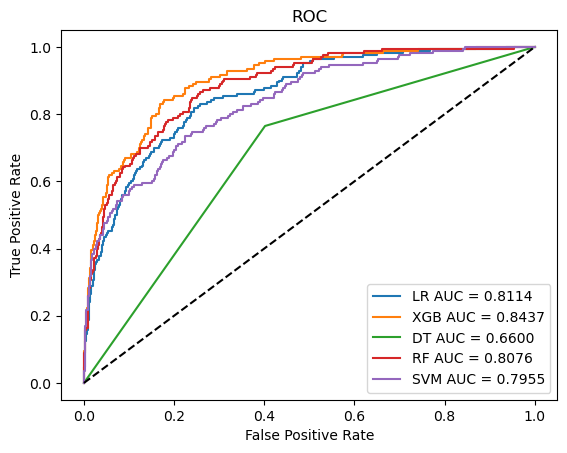

In [123]:
plt.plot(lr_fpr, lr_tpr, label= f'LR AUC = {lr_mean_auc:.4f}') # LogReg
plt.plot(xgb_fpr, xgb_tpr, label= f'XGB AUC = {xgb_mean_auc:.4f}') # XGBoost
plt.plot(dt_fpr, dt_tpr, label= f'DT AUC = {dt_mean_auc:.4f}') # Decision Tree
plt.plot(rf_fpr, rf_tpr, label= f'RF AUC = {rf_mean_auc:.4f}') # Random Forest
#plt.plot(nb_fpr, nb_tpr, label= f'NB AUC = {nb_mean_auc:.4f}') # Naive Bayes
plt.plot(svm_fpr, svm_tpr, label= f'SVM AUC = {svm_mean_auc:.4f}') # SVM

plt.plot([0, 1], [0, 1], 'k--') 

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Test Performance CV

In [124]:
# Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
lr_auc = auc(lr_fpr, lr_tpr)

In [125]:
# XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

In [126]:
# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rnd_forest.predict_proba(X_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

In [127]:
# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dec_tree.predict_proba(X_test)[:,1])
dt_auc = auc(dt_fpr, dt_tpr)

In [128]:
# Naive Bayes
#nb_fpr, nb_tpr, _ = roc_curve(y_test, modelNB.predict_proba(X_test)[:,1])
#nb_auc = auc(nb_fpr, nb_tpr)

In [129]:
# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
svm_auc = auc(svm_fpr, svm_tpr)

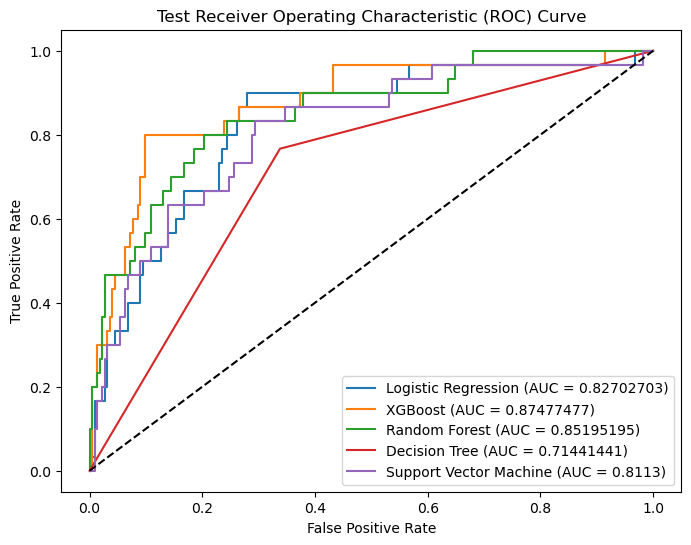

In [130]:
plt.figure(figsize=(8, 6))

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.8f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.8f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.8f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.8f})')
#plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.8f})')
plt.plot(svm_fpr, svm_tpr, label= f'Support Vector Machine (AUC = {svm_auc:.4f})') 

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

### Winner Winner.. 

> The winning xgboost model with its parameters will be trained once modre houwever now using the entire X_Final train data set to include more data

In [131]:
xgboost_best = xgboost

xgboost_best.fit(X_Final,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.06, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.255, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=135, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

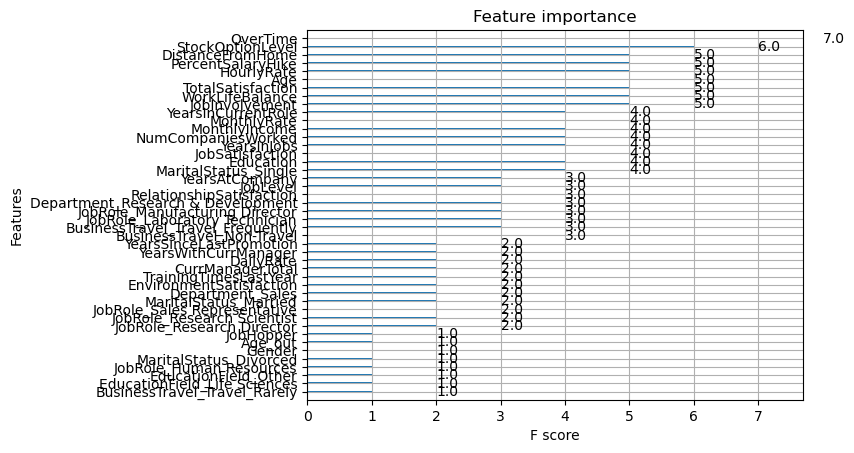

In [132]:
import xgboost as xgb

# plot feature importance
xgb.plot_importance(xgboost_best)
plt.show()

F score is calculated based on the number of times a feature is used to split the data across all trees in the model and the improvement in model performance achieved by each split.

The most important features in ascending order with Fscore of 5 or grater are: JobInvolvement, WorkLifeBalance, TotalSatisfaction, Age, HourlyRate, PercentSalaryHike, DistanceFromHome, StockOptionLevel, OverTime

In [133]:
#Get shap values

explainer = shap.Explainer(xgboost)
model_output = xgb.DMatrix(X_Final)
model_output_subset = model_output.slice(range(100))
shap_values = explainer.shap_values(model_output_subset, approximate=True)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [134]:
X_Final.columns


Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Gender',
       'OverTime', 'Age_out', 'JobHopper', 'DistanceFromHome_out',
       'EnvironmentSatisfaction', 'StockOptionLevel', 'Education',
       'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfact

In [182]:
shap_df = pd.DataFrame(shap_values, columns=list(X_Final.columns))

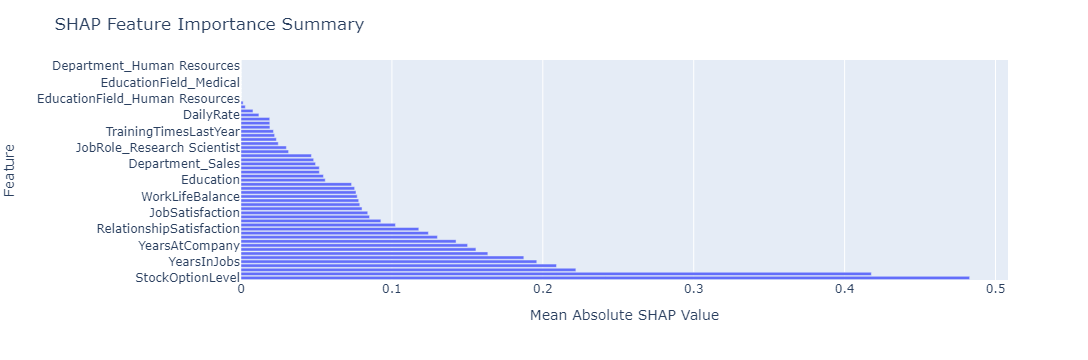

In [183]:

# Sort the SHAP DataFrame by mean absolute SHAP value
shap_dfs = shap_df.abs().mean().sort_values(ascending=False).reset_index(name='mean_abs_shap')

# Create a fig
fig = px.bar(shap_dfs, x='mean_abs_shap', y='index', orientation='h')


fig.update_xaxes(title='Mean Absolute SHAP Value')
fig.update_yaxes(title='Feature')
fig.update_layout(title='SHAP Feature Importance Summary')

fig.show()

Commonly used is the F score which can be retrieved from xgb, alternativley we  while SHAP shows the contribution or the importance of each feature on the prediction of the model, it does not evaluate the quality of the prediction itself. SHAP values are a tool for explaining model predictions and identifying important features. Both metrics can be useful in different contexts and for different purposes, so it ultimately depends on the specific problem and goals of the analysis.

THe most important columns are OverTIme, StockOptionLevel, Age, Marital Status Single, Yearsin Jobs, JobLevel PercentSalaryHike. along these features we should decide how to spend HR budgets

In [184]:
shap_df

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,...,JobLevel,CurrManagerTotal,YearsInJobs,NumCompaniesWorked,TotalSatisfaction,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,DistanceFromHome,YearsAtCompany,YearsSinceLastPromotion
0,0.029984,0.389026,0.04345,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,0.171019,0.0,0.029530,0.006721,0.020153,0.0,...,0.199242,0.013233,-0.217985,-0.047385,-0.184237,-0.073267,-0.006914,0.128907,0.082772,0.128984,0.140367,0.0,0.184358,0.028036,0.207308,-0.098566,0.128681
1,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,-0.065368,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,0.199242,0.013233,0.020894,-0.047385,0.053909,-0.073267,-0.006914,0.128907,0.082772,0.128984,-0.165806,0.0,-0.113774,-0.036587,0.012624,-0.098566,-0.049486
2,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,-0.052286,0.020894,-0.047385,-0.317363,0.016129,-0.006914,-0.018006,-0.122413,-0.081386,-0.165806,0.0,-0.113774,-0.036587,-0.025410,-0.098566,-0.049486
3,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,-0.052286,-0.217985,-0.047385,-0.074135,-0.283348,-0.006914,0.128907,-0.122413,-0.081386,-0.165806,0.0,0.184358,-0.036587,-0.053520,-0.098566,-0.049486
4,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,-0.052286,-0.217985,-0.047385,0.053909,-0.283348,-0.006914,0.128907,-0.122413,-0.081386,0.140367,0.0,0.008633,0.028036,0.012624,-0.098566,0.128681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,-0.063264,0.0,...,0.199242,0.013233,-0.217985,-0.047385,-0.074135,0.259043,-0.006914,-0.018006,0.256240,0.128984,0.140367,0.0,-0.054485,-0.036587,0.012624,-0.098566,-0.049486
96,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,-0.052286,-0.217985,-0.047385,0.582429,-0.283348,-0.006914,-0.018006,-0.122413,-0.081386,0.240788,0.0,0.008633,0.028036,0.207308,-0.098566,0.128681
97,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,-0.052286,-0.217985,-0.047385,-0.074135,-0.283348,-0.006914,0.128907,-0.122413,-0.081386,0.240788,0.0,-0.054485,-0.036587,0.207308,-0.098566,-0.049486
98,0.029984,-0.081060,-0.01383,0.0,0.023131,0.0,0.0,0.002941,0.0,0.0,-0.002077,-0.055631,0.0,0.029530,0.006721,0.020153,0.0,...,-0.178505,0.013233,-0.217985,-0.047385,-0.074135,0.016129,-0.006914,-0.018006,-0.122413,-0.081386,-0.018559,0.0,0.008633,0.028036,0.106345,-0.098566,0.128681


## Setting thresholds

We want to set thresholds that minimize the false negative rate where we predict an employee stays but actually they leave

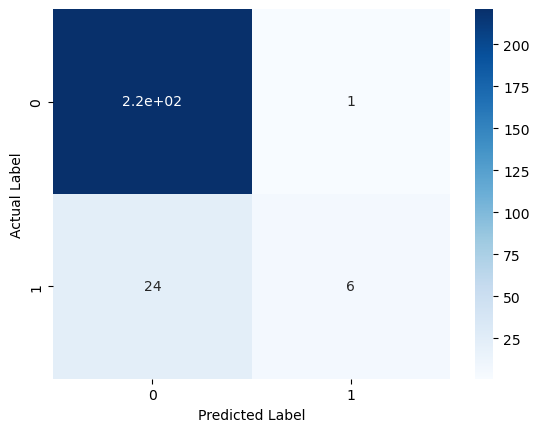

In [139]:
cm = confusion_matrix(y_test, xgboost.predict(X_test)) # how did the model do one our test set so calling the version not fitted on eve
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [140]:
thresholds = list(np.linspace(0.00, 1.0,10000))

In [141]:
t_data = []
for t in thresholds:
    cm = confusion_matrix(y_test, [1 if pred > t else 0 for pred in xgboost.predict_proba(X_test)[:,-1]])
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    tup = (t,TP,TN,FP,FN,cm)
    t_data.append(tup)
    
thres_df = pd.DataFrame(data=t_data, columns= ['Thres', 'TP','TN','FP','FN','CM'])

In [142]:
zoom_t = thres_df[(thres_df['Thres'] > 0.15) & (thres_df['Thres'] < 0.280)]

In [143]:
zoom_t.shape

(1300, 6)

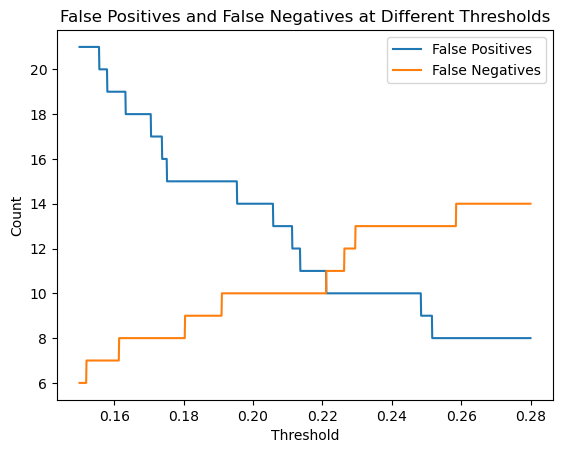

In [144]:
plt.plot(zoom_t['Thres'], zoom_t['FP'], label='False Positives')
plt.plot(zoom_t['Thres'], zoom_t['FN'], label='False Negatives')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('False Positives and False Negatives at Different Thresholds')
plt.legend()

plt.show()

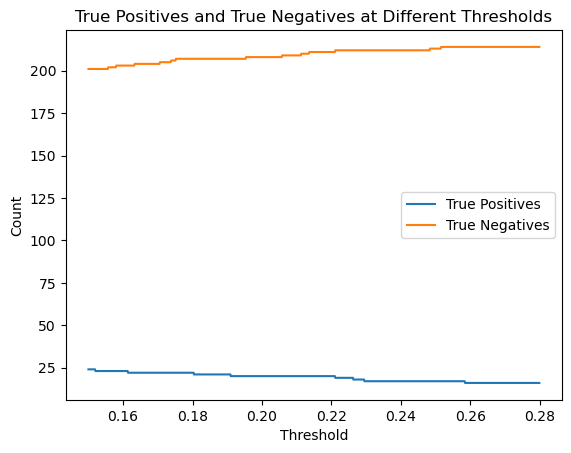

In [145]:
plt.plot(zoom_t['Thres'], zoom_t['TP'], label='True Positives')
plt.plot(zoom_t['Thres'], zoom_t['TN'], label='True Negatives')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('True Positives and True Negatives at Different Thresholds')
plt.legend()
plt.show()

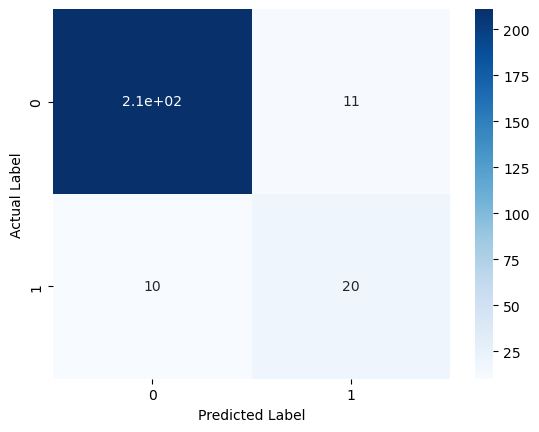

In [146]:
t = 0.22
preds_at_t = [1 if pred > t else 0 for pred in xgboost.predict_proba(X_test)[:,-1]]
cm = confusion_matrix(y_test, preds_at_t)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

##### COST BENEFIT ANALYSIS
 Lets make some assumptions

Assumtion 1: These are all employees we want to keep indefinatley 

What does it cost to hire someone new? 
- HR Representative cost (+/- 30h) * 30 an hour = 900
- Costs to train someone again (+/- 400)
- Equiptment (+/- 300)
- Job Advetisement (+/- 100)
- Time lost shadowing (+/- 300)

2000

What are the most important features for prediction?

JobInvolvement, WorkLifeBalance, TotalSatisfaction, Age, HourlyRate, PercentSalaryHike, DistanceFromHome, StockOptionLevel, OverTime

Who is at risk?
- People working OverTime- 
- People with low TotalSatisfaction and JobInvolvement
- People with low PercentSalaryHike or StockOptionLevel
- People far away from work 
- People with a low hourly rate
- People with high age

So what are viable options to try and keep someone 
- Offer greater PercentSalaryHike or a flat bonus (last resort bonus added to their salary) 
- Cut the OverTime completley 
- Offer Hybrid Working solutions to employees who live far away
- Offer an increased StockOptionLevel (this could be done in percetages as opposed to levels, implementing an equity prgram, employees can only redeem if they complete the program (5y))
- Improve WorkLifeBalance

Whilst we dont know if any of these options are actually going to make someone stay for sure or not lets spend some money on employees that we predict will leave. .Better yet lets do it as a portion of what it costs to hire someone. lets say we spend 500$ on everyone for which we predict that they will leave. 

So lets assign costs to different quadrants of the confusion matrix 

TP = we predict an employee leaves (we spend -500) and he actually leaves (-2000)

FP = we predict an employee leaves (-500) and he actually stays (-2000)

FN = we predict an employee stays (0) and he actually leaves (-2000)

TN = we predict an employee stays (0) and he actually stays (0)

So with this being said we want to know what the costs of each are at different thesholds, realistically we are looking for the treshold that minimizes the count of FN whilst minimizing the sum of the costs. We are going to use the expected cost as conceptualized for decision trees to derive the cost of what we dont know. Using Conditional Probabilities and multiplying them by the cost of hiring someone new.


In [147]:
#'''
#Total = cm.sum()
#TP = cm[1][1]
#TN = cm[0][0]
#FP = cm[0][1]
#FN = cm[1][0]
#P(p1) = FP + TP / Total
#P(p0) = 1- P(p1)
#P(a1) = FN + TP 
#P(a0) = 1 - P(a1)
#P(a1givenp1) = TP / TP + FP # PRECISION
#P(a0givenp1) = FP / TP + FP # fpr
#P(a1givenp0) = FN / TN + FN
#P(a0givenp0) =  TN / TN + FN
#''''

In [148]:
thres_df

,Thres,TP,TN,FP,FN,CM
0,0.0000,30,0,222,0,"[[0, 222], [0, 30]]"
1,0.0001,30,0,222,0,"[[0, 222], [0, 30]]"
2,0.0002,30,0,222,0,"[[0, 222], [0, 30]]"
3,0.0003,30,0,222,0,"[[0, 222], [0, 30]]"
4,0.0004,30,0,222,0,"[[0, 222], [0, 30]]"
...,...,...,...,...,...,...
9995,0.9996,0,222,0,30,"[[222, 0], [30, 0]]"
9996,0.9997,0,222,0,30,"[[222, 0], [30, 0]]"
9997,0.9998,0,222,0,30,"[[222, 0], [30, 0]]"
9998,0.9999,0,222,0,30,"[[222, 0], [30, 0]]"


In [149]:
def make_costs(m_df): 
    data_now = []
    for i in list(m_df.index):
        row= m_df.iloc[i]
        
        #TP = we predict an employee leaves (we spend -500) and he actually leaves -2000 
        TPCost = row[1] * 2500
        
        #TN = we predict an employee stays (0) and he actually stays
        TNCost = 0
        
        #FP = we predict an employee leaves (-500) and he actually stays(0) - 
        FPCost = row[3] * 500

        #FN = we predict an employee stays (0) and he actually leaves -2000 
        FNCost = 2000 * row[4]
        
        #Lets append this data to the df
        tup = (TPCost, TNCost, FPCost, FNCost)
        data_now.append(tup)
    return pd.DataFrame(data=data_now, columns= ['TPCost', 'TNCost', 'FPCost', 'FNCost'])


In [150]:
costs_df = pd.concat([thres_df, make_costs(thres_df)], axis= 1)
costs_df

,Thres,TP,TN,FP,FN,CM,TPCost,TNCost,FPCost,FNCost
0,0.0000,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0
1,0.0001,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0
2,0.0002,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0
3,0.0003,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0
4,0.0004,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000
9996,0.9997,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000
9997,0.9998,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000
9998,0.9999,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000


In [151]:
costs_df['SumCost'] = costs_df.loc[:,['TPCost', 'TNCost', 'FPCost', 'FNCost']].sum(axis=1)

In [152]:
costs_df[(costs_df['FN'] == costs_df['FN'].min()) & (costs_df['TN'] == costs_df['TN'].min())]

,Thres,TP,TN,FP,FN,CM,TPCost,TNCost,FPCost,FNCost,SumCost
0,0.0000,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
1,0.0001,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
2,0.0002,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
3,0.0003,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
4,0.0004,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
5,0.0005,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
6,0.0006,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
7,0.0007,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
8,0.0008,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
9,0.0009,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000


In [153]:
costs_df

,Thres,TP,TN,FP,FN,CM,TPCost,TNCost,FPCost,FNCost,SumCost
0,0.0000,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
1,0.0001,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
2,0.0002,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
3,0.0003,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
4,0.0004,30,0,222,0,"[[0, 222], [0, 30]]",75000,0,111000,0,186000
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000,60000
9996,0.9997,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000,60000
9997,0.9998,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000,60000
9998,0.9999,0,222,0,30,"[[222, 0], [30, 0]]",0,0,0,60000,60000


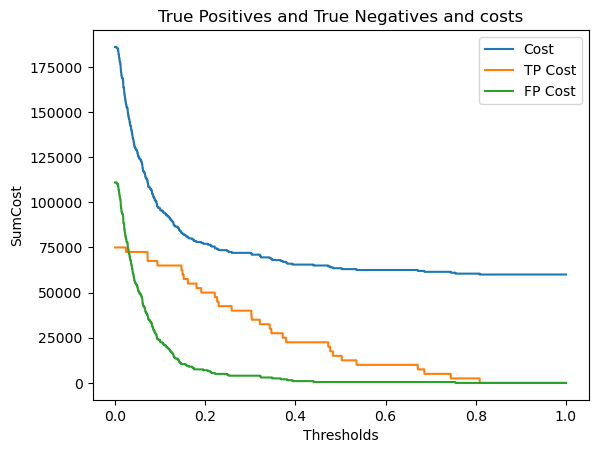

In [154]:
plt.plot(costs_df['Thres'], costs_df['SumCost'], label='Cost')
plt.plot(costs_df['Thres'], costs_df['TPCost'], label='TP Cost')
plt.plot(costs_df['Thres'], costs_df['FPCost'], label='FP Cost')

plt.xlabel('Thresholds')
plt.ylabel('SumCost')
plt.title('True Positives and True Negatives and costs')
plt.legend()
plt.show()

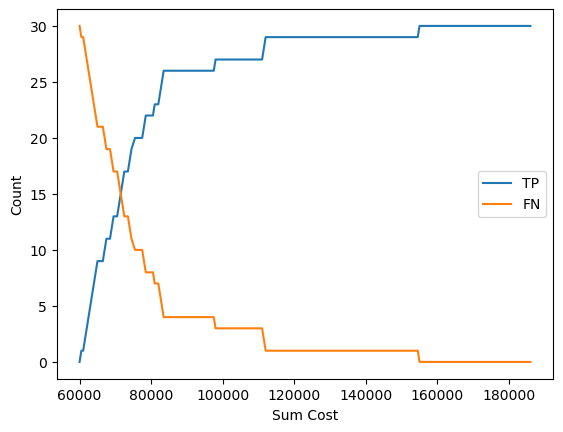

In [155]:
plt.plot(costs_df['SumCost'], costs_df['TP'], label='TP')

plt.plot(costs_df['SumCost'], costs_df['FN'], label='FN')

plt.xlabel('Sum Cost')
plt.ylabel('Count')
plt.title('')
plt.legend()
plt.show()

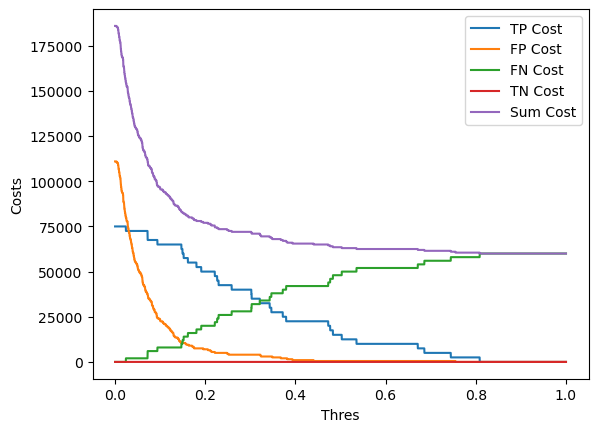

In [156]:
plt.plot(costs_df['Thres'], costs_df['TPCost'], label='TP Cost')
plt.plot(costs_df['Thres'], costs_df['FPCost'], label='FP Cost')
plt.plot(costs_df['Thres'], costs_df['FNCost'], label= 'FN Cost')
plt.plot(costs_df['Thres'], costs_df['TNCost'], label='TN Cost')
plt.plot(costs_df['Thres'], costs_df['SumCost'], label='Sum Cost')
plt.xlabel('Thres')
plt.ylabel('Costs')
plt.title('')
plt.legend()
plt.show()

In [157]:
# For presentation

graph_me = costs_df[['Thres','TPCost', 'TNCost', 'FPCost', 'FNCost', 'SumCost']]
graph_me.to_csv('graph_table.csv')

Whilst the threshold at 0.22 balances most evenly the confusion matrix with FP = 11 and FN a= 10 and TN = 20. When applying a cost analysis the true threshold can be derived. The assumptions made were explained earlier. 

So the analysis above of the thresholds and the cost of each outcomes of the CM. Lets do this in three bins and explain what is going on. 

- Bin 1, Threshold between 0.0 and 0.2
Sum costs is high because we are predicting that everyone is leaving. we give everyone 500 euro to stay, some do and others still leave but we gave everyone that the bonus to get them to stay. As we increase the Threshold some of some of the predictions we got right we start to get wrong and those costs begin to trade off. The values were we predict they stay and they do wont cost us anything. however the count of those TN is increasing as the false positive also decreases. Sum costs starts to quickly decrease. 


- Bin 3, Threshold between 0.5 and 0.8 
Here the sum costs is being minimized. This is mainly because we are not trying to convince anyone to stay there is minimal no false positives so we dont give anyone money accidentally who is staying. On the otherhand of those people levaing we are predicting them all wrong and no one is given money to stay. the model however will also be highly inaccurate just letting people walk right out the door. 

- Bin 2 Between 0.2 and 0.5 
we are using the program to incentivize people to stay here we are spending relativley however are trying to convince some people to stay. infact the costs that we are spending on people who we think will leave is. in the graph below you can see that at threshold 0.33 we are minimizing our FP cost and are giving away the least bonusses incorrectly. but balancing the number of people we try to convince to stay by cost with the ones we loose. around that threshold TP cost and FN cost come close together and show me that of a total of 30 people leaving i can spend 500 on 13 people to try to convince them. theres also 6 people we handed money out to for no reason At the same time the the FN cost is increasing as a trade off of the TP cost seen as that then we are still handing out money. The costs at that theshold still include some false positives. Specifically 9,000 more than the minimal sum cost which occurs with a high threshold. 

if you take it to the point where you want to minimize the people who got money that weerent supposed to then you set the theshold at 0.45 and you only accidentally invest 500 euro in one person. however you are only spending money on trying to save 9 people you know are going to leave out of 20. the additonal costs are 4500 at that point. 


In [158]:
costs_df.iloc[3300]

Thres                  0.330033
TP                           13
TN                          216
FP                            6
FN                           17
CM         [[216, 6], [17, 13]]
TPCost                    32500
TNCost                        0
FPCost                     3000
FNCost                    34000
SumCost                   69500
Name: 3300, dtype: object

In [159]:
costs_df.iloc[4500]

Thres                 0.450045
TP                           9
TN                         221
FP                           1
FN                          21
CM         [[221, 1], [21, 9]]
TPCost                   22500
TNCost                       0
FPCost                     500
FNCost                   42000
SumCost                  65000
Name: 4500, dtype: object

In [160]:
df = costs_df[(costs_df['Thres'] > 0.2) & (costs_df['Thres'] < 0.5)]

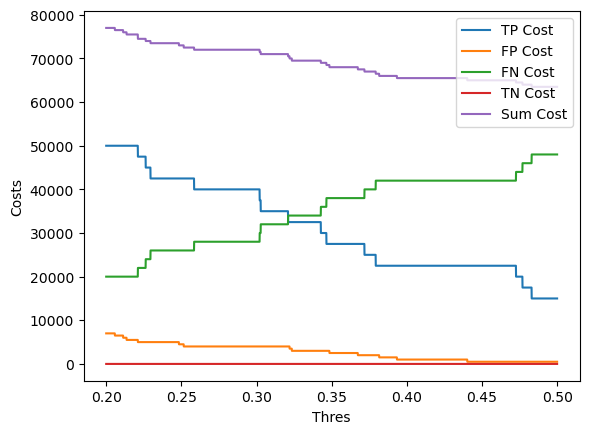

In [161]:
plt.plot(df['Thres'], df['TPCost'], label='TP Cost')
plt.plot(df['Thres'], df['FPCost'], label='FP Cost')
plt.plot(df['Thres'], df['FNCost'], label= 'FN Cost')
plt.plot(df['Thres'], df['TNCost'], label='TN Cost')
plt.plot(df['Thres'], df['SumCost'], label='Sum Cost')
plt.xlabel('Thres')
plt.ylabel('Costs')
plt.title('')
plt.legend()
plt.show()

## Submission

In [162]:
# Submit
Real_deal = pd.read_csv('test.csv')
ids = Real_deal['id']

In [163]:
# Extract
Real_deal['DistanceFromHome_out'] = (Real_deal['DistanceFromHome'] > 27).astype('int')

Real_deal['Age_out'] = (Real_deal['Age'] > 57.5).astype('int')

Real_deal['CurrManagerTotal'] = Real_deal['YearsWithCurrManager'] / Real_deal['TotalWorkingYears']

Real_deal['TotalSatisfaction'] = Real_deal.loc[:,['JobInvolvement', 'EnvironmentSatisfaction' , 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

Real_deal['NumCompaniesWorked'] = Real_deal['NumCompaniesWorked'].replace(0, 1)

Real_deal['YearsInJobs'] = Real_deal["TotalWorkingYears"] / Real_deal["NumCompaniesWorked"]

Real_deal['JobHopper'] = ((Real_deal["NumCompaniesWorked"] > 4) & (Real_deal["YearsInJobs"] < 2.14)).astype(int)

In [164]:
Real_deal.isna().sum()

id                           0
Age                          0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

In [165]:
# Clean
drp = ['Over18', 
       'StandardHours', 
       'EmployeeCount' ,
       'PerformanceRating', 
]

In [166]:
Real_deal.drop('id',axis=1,inplace=True) #Because its a nominal variable that shouldnt be related to attrition in anyway.
Real_deal.drop(drp ,axis=1,inplace=True) #irrelevant & redundant
Real_deal['CurrManagerTotal'].fillna(0, inplace= True) #employees with no work expereience and also new managers
#Real_deal.loc[536,'YearsWithCurrManager'] = 5 # Employee who has manage for longer than he worked
#Real_deal.loc[536, 'CurrManagerTotal'] = 1
Real_deal['Education'].replace(15,3,inplace=True) # most frequent value Lab Technicians in Life Sciences (3)
Real_deal['JobLevel'].replace(7,1,inplace=True)

In [167]:
nom_bi_col= ['Gender',
             'OverTime', 
             'Age_out', 
             'JobHopper', 
            'DistanceFromHome_out']
nom_cols= ['BusinessTravel', 
           'EducationField', 
           'JobRole', 
           'MaritalStatus',
          'Department']
ordinal_cols = ['EnvironmentSatisfaction',
                'StockOptionLevel', 
                'Education', 
                'JobInvolvement', 
                'JobSatisfaction', 
                'RelationshipSatisfaction',
                'WorkLifeBalance', 
                'TrainingTimesLastYear',
               'JobLevel']
ratio_cols = ['CurrManagerTotal', 
              'YearsInJobs',
              'NumCompaniesWorked', 
              'TotalSatisfaction',
              'Age', 
              'DailyRate',
              'HourlyRate', 
              'MonthlyIncome',
              'MonthlyRate', 
              'PercentSalaryHike', 
              'TotalWorkingYears', 
              'YearsInCurrentRole', 
              'YearsWithCurrManager',
             'DistanceFromHome',
             'YearsAtCompany',
             'YearsSinceLastPromotion']

In [168]:
len(nom_bi_col + nom_cols+ ordinal_cols+ ratio_cols)

35

In [169]:
Real_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1119 non-null   int64  
 1   BusinessTravel            1119 non-null   object 
 2   DailyRate                 1119 non-null   int64  
 3   Department                1119 non-null   object 
 4   DistanceFromHome          1119 non-null   int64  
 5   Education                 1119 non-null   int64  
 6   EducationField            1119 non-null   object 
 7   EnvironmentSatisfaction   1119 non-null   int64  
 8   Gender                    1119 non-null   object 
 9   HourlyRate                1119 non-null   int64  
 10  JobInvolvement            1119 non-null   int64  
 11  JobLevel                  1119 non-null   int64  
 12  JobRole                   1119 non-null   object 
 13  JobSatisfaction           1119 non-null   int64  
 14  MaritalS

In [170]:
pipe_combined = Pipeline([
    ('trans', ColumnTransformer([
        ('onehot', OneHotEncoder(sparse=False), nom_cols),
        ('label', OrdinalEncoder(), nom_bi_col),
        ('minmax', MinMaxScaler(), ordinal_cols), 
        ('standard', StandardScaler(), ratio_cols)
    ]))
])

In [171]:
# FIT combined
Final_X = pipe_combined.fit_transform(Real_deal)

In [172]:

#PREPROCESS
# FIT combined
Final_X = pipe_combined.fit_transform(Real_deal)
ohe_cols_final = list(pipe_combined['trans'].named_transformers_['onehot'].get_feature_names_out(nom_cols))
Real_real_deal = pd.DataFrame(Final_X, columns= ohe_cols_final + nom_bi_col + ordinal_cols + ratio_cols)

y_pred = xgboost_best.predict_proba(Real_real_deal)[:,-1]

submission = pd.DataFrame({
    'id': ids,
    'Attrition': y_pred   
})
submission

,id,Attrition
0,1677,0.272259
1,1678,0.084800
2,1679,0.051031
3,1680,0.057885
4,1681,0.493457
...,...,...
1114,2791,0.142928
1115,2792,0.006554
1116,2793,0.054080
1117,2794,0.034633


In [173]:
submission.to_csv('submissions.csv', index=False )